<a href="https://colab.research.google.com/github/ajayjai30/FUNCTIONAL-MODEL-USING-MNIST-DATASET/blob/main/functional_model_image_classification_using_fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot

In [ ]:
from keras.models import Model
from keras.layers import Dense,Dropout,Input
from keras.datasets import fashion_mnist
from keras.utils import model_to_dot,to_categorical
import livelossplot
from keras import optimizers

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
def summary_of_data(x_train,y_train,x_test,y_test):
  print("Shape and type of Training images set:",x_train.shape,'\n',x_train.dtype)
  print("Shape and type of Training labels set:",y_train.shape,'\n',x_test.dtype)
  print("Shape and type of Testing images set:",x_test.shape,'\n',y_train.dtype)
  print("shape and type of Testing labels set:",y_test.shape,'\n',y_test.dtype)

In [ ]:
summary_of_data(x_train,y_train,x_test,y_test)

Shape and type of Training images set: (60000, 28, 28) 
 uint8
Shape and type of Training labels set: (60000,) 
 uint8
Shape and type of Testing images set: (10000, 28, 28) 
 uint8
shape and type of Testing labels set: (10000,) 
 uint8


In [ ]:
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
summary_of_data(x_train,y_train,x_test,y_test)

Shape and type of Training images set: (60000, 784) 
 float32
Shape and type of Training labels set: (60000,) 
 float32
Shape and type of Testing images set: (10000, 784) 
 uint8
shape and type of Testing labels set: (10000,) 
 uint8


In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
summary_of_data(x_train,y_train,x_test,y_test)

Shape and type of Training images set: (60000, 784) 
 float32
Shape and type of Training labels set: (60000, 10) 
 float32
Shape and type of Testing images set: (10000, 784) 
 float32
shape and type of Testing labels set: (10000, 10) 
 float32


In [ ]:
input=Input(shape=(784,),name="Input_layer")
hd=Dense(500,activation='relu',name="Hidden_layer-1")(input)
hd=Dropout(0.5)(hd)
hd=Dense(300,activation='relu',name='Hidden_layer-2')(hd)
hd=Dropout(0.5)(hd)
hd=Dense(300,activation='relu',name='Hidden_layer-3')(hd)
hd=Dropout(0.2)(hd)
hd=Dense(300,activation='relu',name='Hidden_layer-4')(hd)
hd=Dense(300,activation='relu',name='Hidden_layer-5')(hd)
hd=Dropout(0.3)(hd)
hd=Dense(300,activation='relu',name='Hidden_layer-6')(hd)
output=Dense(10,activation='softmax',name='output_layer')(hd)

In [ ]:
model=Model(input,output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Hidden_layer-1 (Dense)      (None, 500)               392500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 Hidden_layer-2 (Dense)      (None, 300)               150300    
                                                                 
 dropout_16 (Dropout)        (None, 300)               0         
                                                                 
 Hidden_layer-3 (Dense)      (None, 300)               90300     
                                                                 
 dropout_17 (Dropout)        (None, 300)               0   

In [ ]:
sgd=optimizers.SGD(0.1)

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [ ]:
plot=livelossplot.PlotLossesKeras()

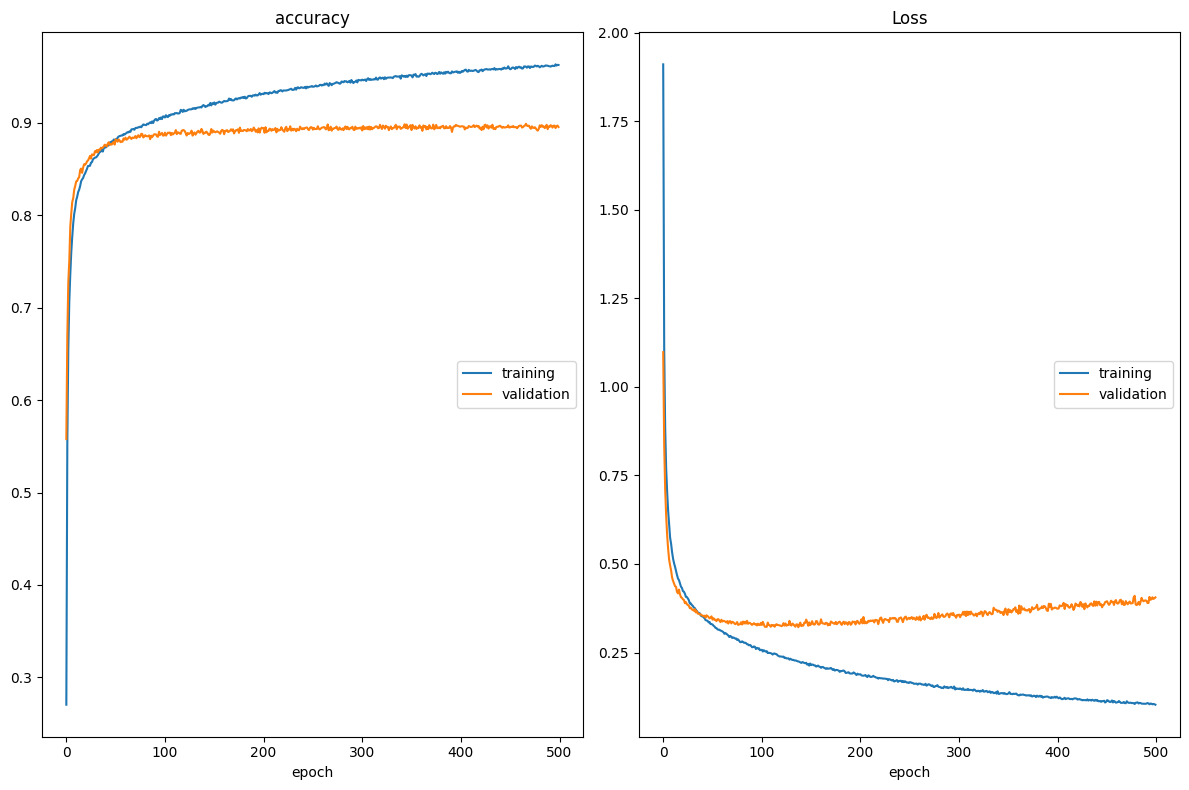

accuracy
	training         	 (min:    0.270, max:    0.963, cur:    0.963)
	validation       	 (min:    0.558, max:    0.899, cur:    0.896)
Loss
	training         	 (min:    0.103, max:    1.910, cur:    0.103)
	validation       	 (min:    0.321, max:    1.098, cur:    0.406)
600/600 [==============================] - 3s 5ms/step - loss: 0.1027 - accuracy: 0.9628 - val_loss: 0.4056 - val_accuracy: 0.8956


In [ ]:
model.fit(x_train,y_train,batch_size=100,callbacks=[plot],epochs=500,verbose=1,validation_data=(x_test,y_test))

In [ ]:
model.evaluate(x_test,y_test,verbose=0)[1]

0.8956000208854675